# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from api_keys import weather_api_key
from citipy import citipy


## Generate Cities List

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding latitudes, longitudes and cities
lat_lngs = []
cities = []

# Set of random lat and lng combinations
lats = np.random.uniform(low=-90.0, high=90.0, size=2000)
lngs = np.random.uniform(low=-180.0, high=180.0, size=2000)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat,lng location
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If city is unique, add it to cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


777

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)
# Create lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []
date_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
       
    #Start the error handling
    #Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
        
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp_max = response_json['main']['temp_max']
        temp_list.append(temp_max)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        cloudiness = response_json['clouds']['all']
        clouds_list.append(cloudiness)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
        
        date = response_json["dt"]
        date_list.append(date)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        
        print("cannot be found, moving to next city...")

http://api.openweathermap.org/data/2.5/weather?appid=8b1c1547db242544a8700adc06ef8373&units=imperial&q=
City Name: kapaa, City ID: 5848280
City Name: makurdi, City ID: 2331140
City Name: ciudad guayana, City ID: 3645528
City Name: beyneu, City ID: 610298
City Name: hermanus, City ID: 3366880
City Name: khatanga, City ID: 2022572
City Name: anadyr, City ID: 2127202
City Name: east london, City ID: 1006984
City Name: bengkulu, City ID: 1649150
City Name: severomuysk, City ID: 2016907
City Name: tiksi, City ID: 2015306
City Name: axams, City ID: 7873600
City Name: kodiak, City ID: 5866583
City Name: cape town, City ID: 3369157
City Name: bethel, City ID: 5282297
City Name: turukhansk, City ID: 1488903
City Name: tateyama, City ID: 1850523
cannot be found, moving to next city...
City Name: valkla, City ID: 587839
City Name: fairbanks, City ID: 5861897
City Name: akdepe, City ID: 601551
City Name: arraial do cabo, City ID: 3471451
City Name: thompson, City ID: 6165406
City Name: hobart, Cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City": city_name_list, "Lat": lat_list, "Lng": lng_list,
                         "Max Temp": temp_list, "Humidity": humidity_list, "Cloudiness": clouds_list,
                         "Wind Speed": wind_speed_list,"Country": country_list, "Date": date_list})
cities_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,82.38,82,64,1.99,US,1627102515
1,Makurdi,7.7411,8.5121,71.64,98,100,4.12,NG,1627102757
2,Ciudad Guayana,8.3533,-62.6528,73.94,96,91,3.09,VE,1627102758
3,Beyneu,45.3167,55.2000,87.87,37,5,10.02,KZ,1627102758
4,Hermanus,-34.4187,19.2345,47.89,60,0,9.48,ZA,1627102758


In [5]:
# Export to .csv file
cities_df.to_csv("output_data/cities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_df= cities_df.loc[cities_df["Humidity"]>100]
humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
# Skipped this step since humidity not greater than 100%

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

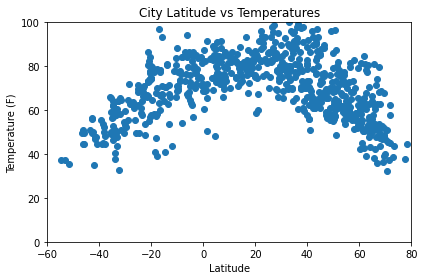

In [9]:
x_values = cities_df["Lat"]
y_values = cities_df["Max Temp"]

plt.scatter(x_values,y_values)
plt.title('City Latitude vs Temperatures')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.tight_layout()
plt.savefig("Images/lat_temp.png")
plt.show()

This plot evaluates the relationship between City Latitude and Temperature showing the increase in Temperature as you aprroach the equator.

## Latitude vs. Humidity Plot

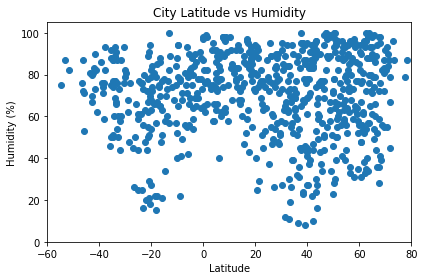

In [10]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.tight_layout()
plt.savefig("Images/lat_humid.png")
plt.show()

This plot evaluates the relationship between City Latitude and Humidity which shows there is not much of a correlation between City Latitude and Humidity .

## Latitude vs. Cloudiness Plot

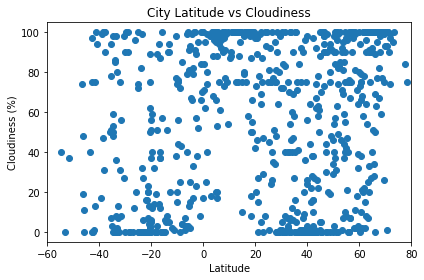

In [11]:
x_values = cities_df["Lat"]
y_values = cities_df["Cloudiness"]

plt.scatter(x_values,y_values)
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.tight_layout()
plt.savefig("Images/lat_clouds.png")
plt.show()

This plot evaluates the relationship between City Latitude and Cloudiness which shows there is not much of a correlation between City Latitude and Cloudiness .

## Latitude vs. Wind Speed Plot

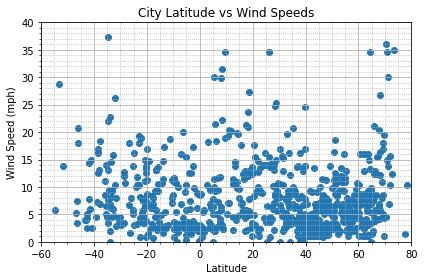

In [12]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('City Latitude vs Wind Speeds')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("Images/lat_wind.png")
plt.show()

This plot evaluates the relationship between City Latitude and Wind Speed which shows the Wind Speed increases as you move further away from the equator(latitude 0).

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.36582366235853075


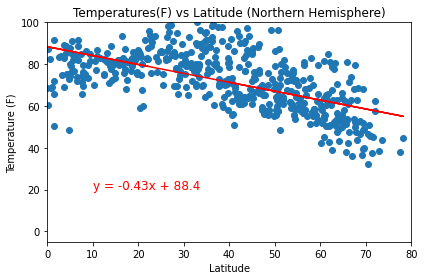

In [13]:
# Create Northern and Southern Hemisphere DataFrames
north= cities_df['Lat'] >= 0
northern_hemisphere = cities_df[north]
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures(F) vs Latitude (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.tight_layout()
print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/nh_lat_temp_regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5033274139070408


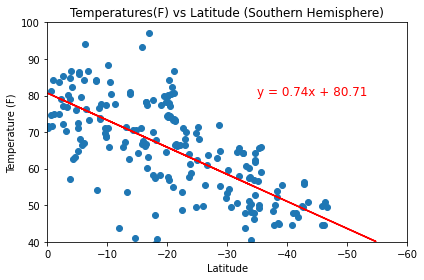

In [14]:
south= cities_df['Lat'] < 0
southern_hemisphere = cities_df[south]
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures(F) vs Latitude (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.tight_layout()
print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/sh_lat_temp_regression.png")
plt.show()

Both Hemispheres show an inverse relationship between latitude and temperature. Hence as you approach the equator the higher the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0054660752615455785


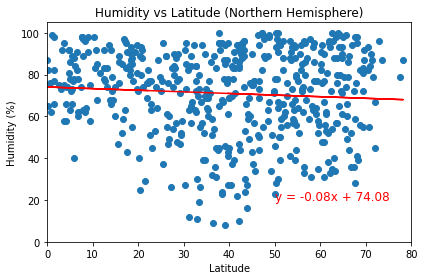

In [15]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity vs Latitude (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.tight_layout()
print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/nh_lat_hum_regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0008426707044757375


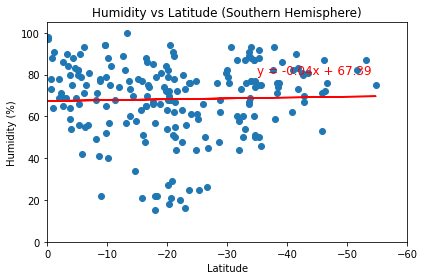

In [16]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity vs Latitude (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
print(f"The r-value is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Images/sh_lat_humid_regression.png")
plt.show()

There is no strong correlation between humidity and latitude. However, there does seem to be a slight positive correlation in both Hemispheres showing in the further away from the equator (latitude 0) humidity increases.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.005067156544948882


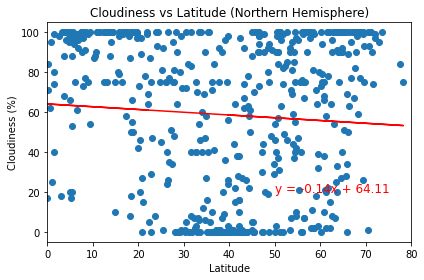

In [17]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness vs Latitude (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
print(f"The r-value is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Images/nh_lat_cloudy_regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.010013572921252887


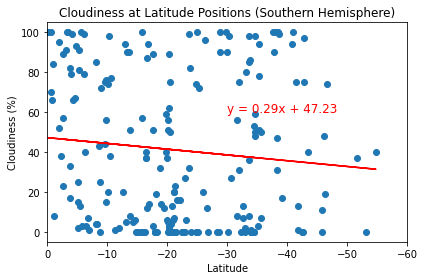

In [18]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
print(f"The r-value is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Images/sh_lat_clouds_regression.png")
plt.show()

There seems to be not much correlation between cloudiness and latitude but yet, the linear regression shows a positive correlation in the Southern Hemisphere but no correlation in the Northern Hemisphere. In the Southern Hemisphere it shows that the further you are from the equator (latitude 0) the less cloudy it is.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.002703757260605632


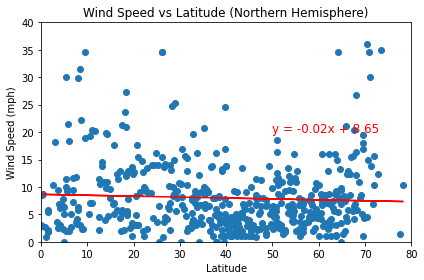

In [19]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed vs Latitude (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
print(f"The r-value is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Images/nh_lat_wind_regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.056974351833356376


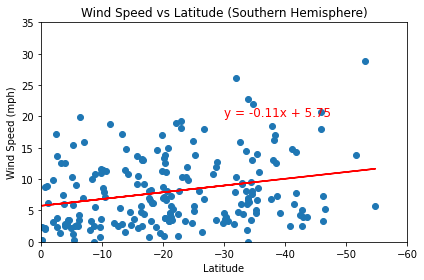

In [20]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed vs Latitude (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
print(f"The r-value is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Images/sh_lat_wind_regression.png")
plt.show()

There is not much correlation between Latitude and Wind speed but however the wind speed increases as you move further away from the equator (latitude 0) in the southern hemisphere but it seems the opposite in the northern hemisphere